# Wstęp
przyglądałem się danym z pomocą pandas i rysowania wykresów w matplotlib. Wiem że całośc powinna być w sparku, i w sparku docelowo będzie ,projekt, ale robiłem to trochę na ostatnią chwilę i pandas mam wrażenie że działa lepiej lokalnie. Niektóre wykresy mogą wydawać się losowe bo próbowałem różnych rzeczy i nie wszystkie miały sens

In [28]:
# biblioteka
!pip install liac-arff

 # Importy i wczytanie danych

In [2]:
import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie pliku ARFF za pomocą liac-arff

In [3]:
with open('quality-prediction-in-a-mining-process.arff', 'r') as f:
    dataset = arff.load(f)

## Tworzenie DataFrame z danych

In [4]:
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Dekodowanie bajtów, czyszczenie nazw kolumn i konwersja liczb

## Dekodowanie kolumn bajtowych do stringów, jeśli istnieją. Usuwamy białe znaki z nazw kolumn

In [5]:
for col in df.select_dtypes([object]):
    if isinstance(df[col].iloc[0], bytes):
        df[col] = df[col].str.decode('utf-8')
df.columns = df.columns.str.strip()

## Zamiana przecinków na kropki i konwersja na float dla kolumn numerycznych, które są w stringach

In [6]:
for col in df.columns:
    if df[col].dtype == object:
        sample = df[col].dropna().iloc[0]
        if isinstance(sample, str) and ',' in sample:
            print(f"Konwertuję kolumnę '{col}' z przecinków na kropki i na float...")
            df[col] = df[col].str.replace(',', '.').astype(float)


Konwertuję kolumnę '%_Iron_Feed' z przecinków na kropki i na float...
Konwertuję kolumnę '%_Silica_Feed' z przecinków na kropki i na float...
Konwertuję kolumnę 'Starch_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Amina_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Ore_Pulp_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Ore_Pulp_pH' z przecinków na kropki i na float...
Konwertuję kolumnę 'Ore_Pulp_Density' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_01_Air_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_02_Air_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_03_Air_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_04_Air_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_05_Air_Flow' z przecinków na kropki i na float...
Konwertuję kolumnę 'Flotation_Column_06_Air_Flow' z przecinków na k

## Konwersja kolumny 'date' do datetime i ustawienie jako indeks

In [7]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)


# Exploracja danych

## Podstawowa eksploracja danych

In [8]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


                     %_Iron_Feed  %_Silica_Feed  Starch_Flow  Amina_Flow  \
date                                                                       
2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

                     Ore_Pulp_Flow  Ore_Pulp_pH  Ore_Pulp_Density  \
date                                                                
2017-03-10 01:00:00        395.713      10.0664              1.74   
2017-03-10 01:00:00        397.383      10.0672              1.74   
2017-03-10 01:00:00        399.668      10.0680              1.74   
2017-03-10 01:00:00        397.939      10.0689              1.74   
2017-03-10 01:00:00        400.254      10.0697      

## Histogram zmiennej docelowej %_Silica_Concentrate

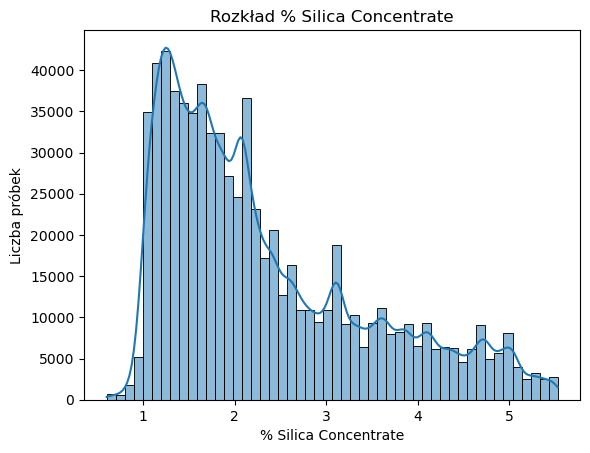

In [9]:
sns.histplot(df['%_Silica_Concentrate'], bins=50, kde=True)
plt.title('Rozkład % Silica Concentrate')
plt.xlabel('% Silica Concentrate')
plt.ylabel('Liczba próbek')
plt.show()


## Macierz korelacji i mapa cieplna

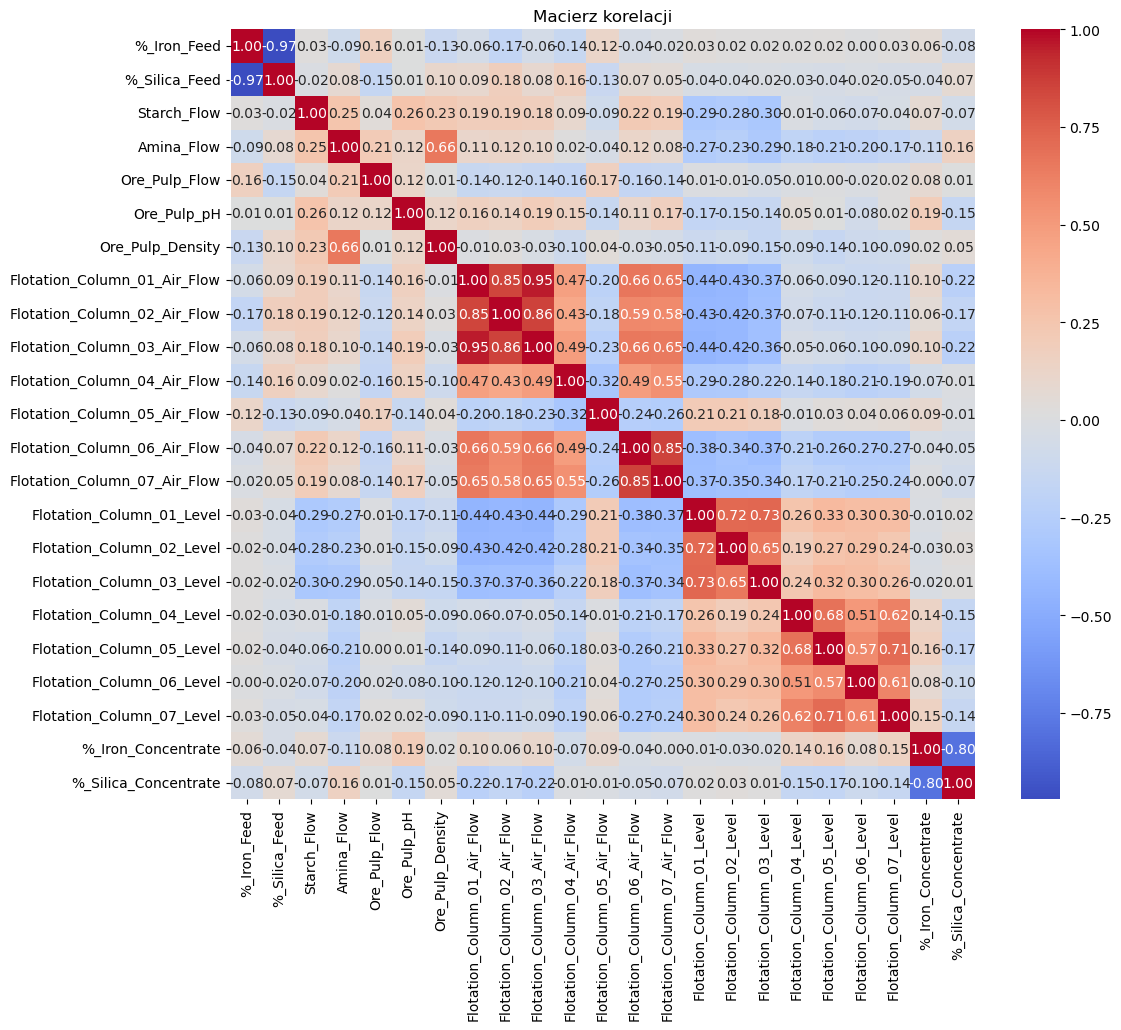

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


## Wykres zmiennej docelowej w czasie (jeśli istnieje indeks daty)

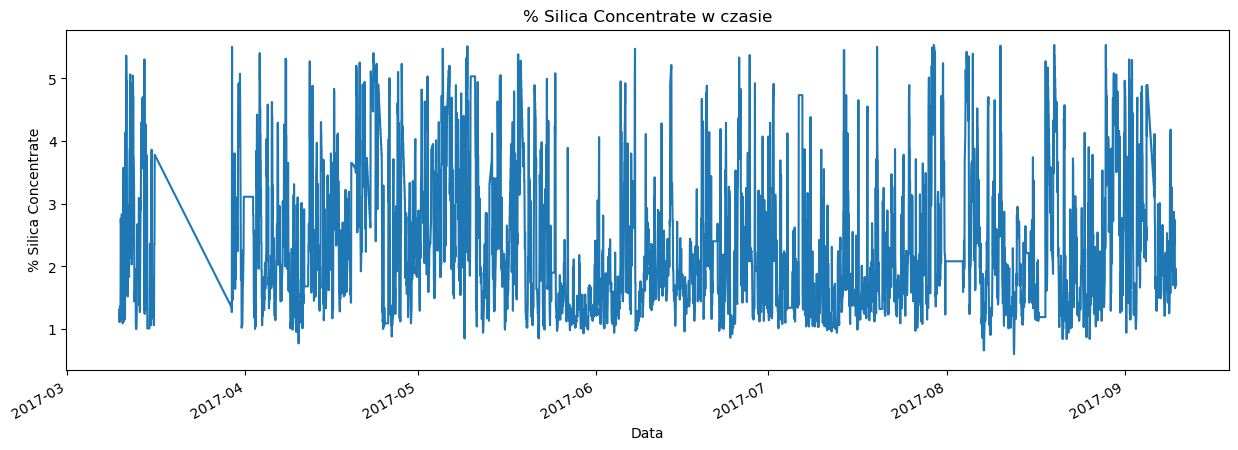

In [11]:
if df.index.name == 'date':
    df['%_Silica_Concentrate'].plot(figsize=(15, 5))
    plt.title('% Silica Concentrate w czasie')
    plt.xlabel('Data')
    plt.ylabel('% Silica Concentrate')
    plt.show()


## Scatterplot %_Silica_Concentrate vs %_Iron_Concentrate

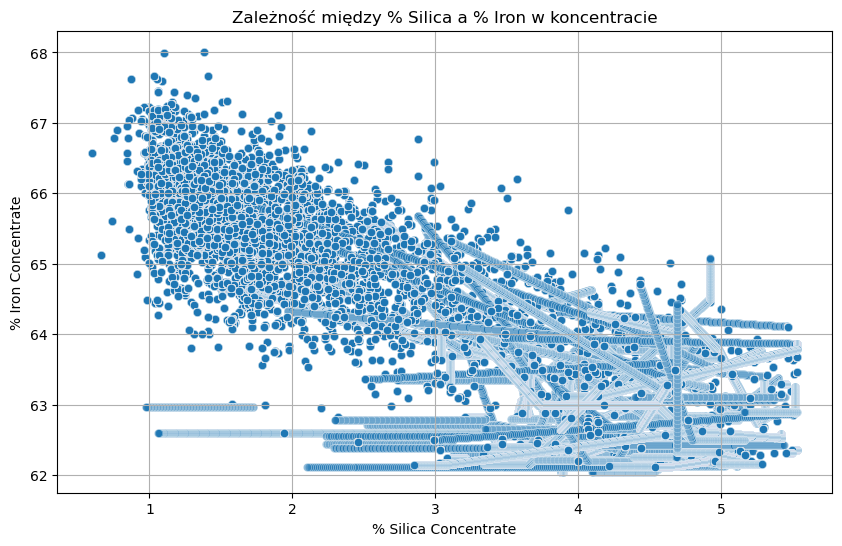

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='%_Silica_Concentrate',
    y='%_Iron_Concentrate',
    alpha=0.5
)
plt.title('Zależność między % Silica a % Iron w koncentracie')
plt.xlabel('% Silica Concentrate')
plt.ylabel('% Iron Concentrate')
plt.grid(True)
plt.show()


## Hexbin plot gęstości punktów Silica vs Iron

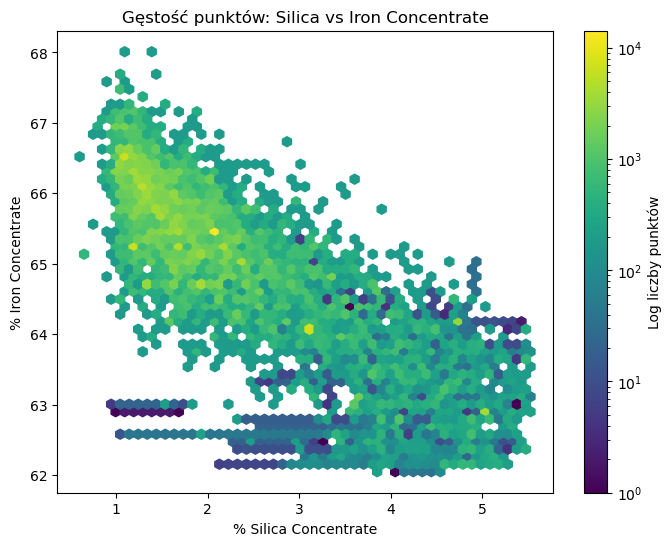

In [13]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['%_Silica_Concentrate'], df['%_Iron_Concentrate'],
           gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='Log liczby punktów')
plt.xlabel('% Silica Concentrate')
plt.ylabel('% Iron Concentrate')
plt.title('Gęstość punktów: Silica vs Iron Concentrate')
plt.show()


## Konwersja kolumn feed i concentrate na float 

In [16]:
for col in ['%_Iron_Feed', '%_Silica_Feed', '%_Iron_Concentrate', '%_Silica_Concentrate']:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(',', '.').astype(float)


## Obliczanie różnic między Iron a Silica na feed i concentrate

In [17]:
df['diff_Iron_Silica_Feed'] = df['%_Iron_Feed'] - df['%_Silica_Feed']
df['diff_Iron_Silica_Concentrate'] = df['%_Iron_Concentrate'] - df['%_Silica_Concentrate']


## Histogram różnicy na etapie feed

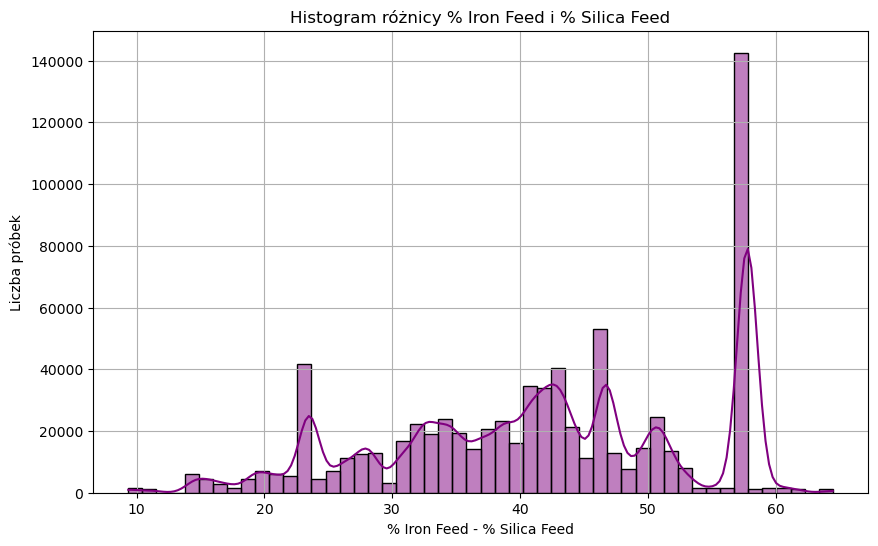

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['diff_Iron_Silica_Feed'], bins=50, kde=True, color='purple')
plt.title('Histogram różnicy % Iron Feed i % Silica Feed')
plt.xlabel('% Iron Feed - % Silica Feed')
plt.ylabel('Liczba próbek')
plt.grid(True)
plt.show()

## Histogram różnicy na etapie concentrate

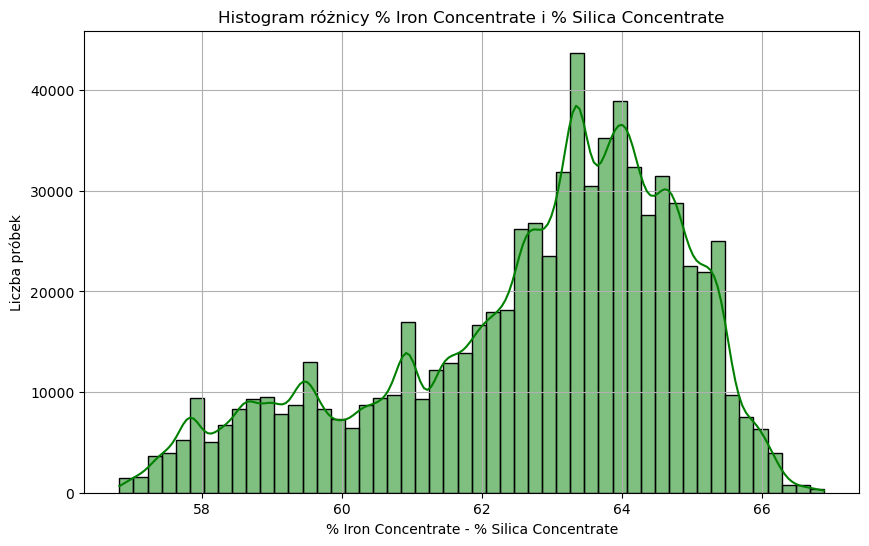

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['diff_Iron_Silica_Concentrate'], bins=50, kde=True, color='green')
plt.title('Histogram różnicy % Iron Concentrate i % Silica Concentrate')
plt.xlabel('% Iron Concentrate - % Silica Concentrate')
plt.ylabel('Liczba próbek')
plt.grid(True)
plt.show()


## Wykres różnicy % Iron i % Silica w czasie (jeśli indeks daty istnieje)

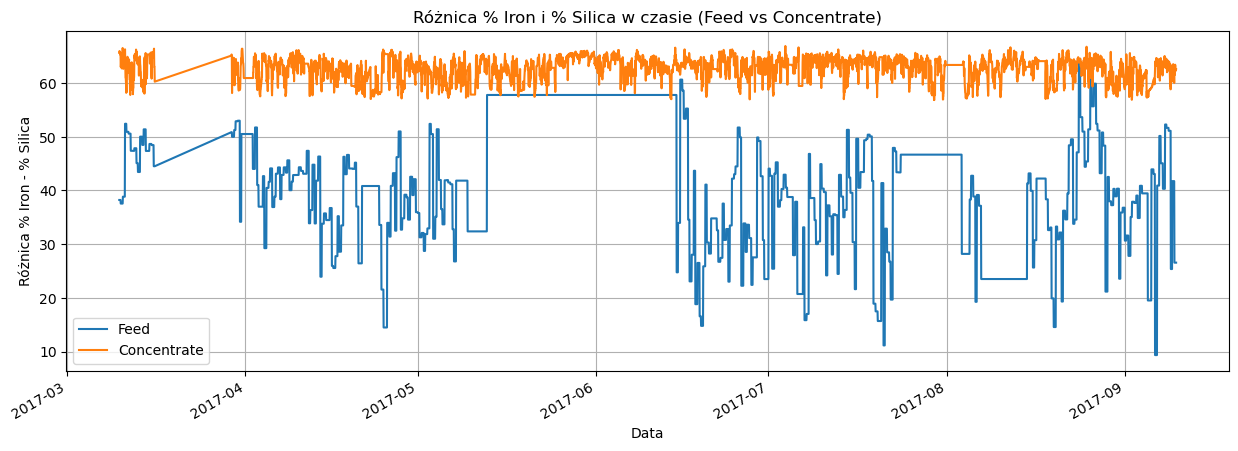

In [27]:
if df.index.name == 'date':
    plt.figure(figsize=(15, 5))
    df['diff_Iron_Silica_Feed'].plot(label='Feed')
    df['diff_Iron_Silica_Concentrate'].plot(label='Concentrate')
    plt.title('Różnica % Iron i % Silica w czasie (Feed vs Concentrate)')
    plt.xlabel('Data')
    plt.ylabel('Różnica % Iron - % Silica')
    plt.legend()
    plt.grid(True)
    plt.show()
